Saving Insurance Dataset.csv to Insurance Dataset.csv
First few rows of the dataset:
   Premiums Paid  Age  Days to Renew  Claims made  Income
0           2800   26            233  3890.076336   28000
1           2950   27            130  2294.444444   29500
2           3100   28            144  2564.545455   31000
3           3250   30             65  1978.260870   32500
4           3400   32             56  2009.090909   34000

Column names in the dataset:
Index(['Premiums Paid', 'Age', 'Days to Renew', 'Claims made', 'Income'], dtype='object')

Missing values in each column:
Premiums Paid    0
Age              0
Days to Renew    0
Claims made      0
Income           0
dtype: int64

Non-numeric columns: []


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

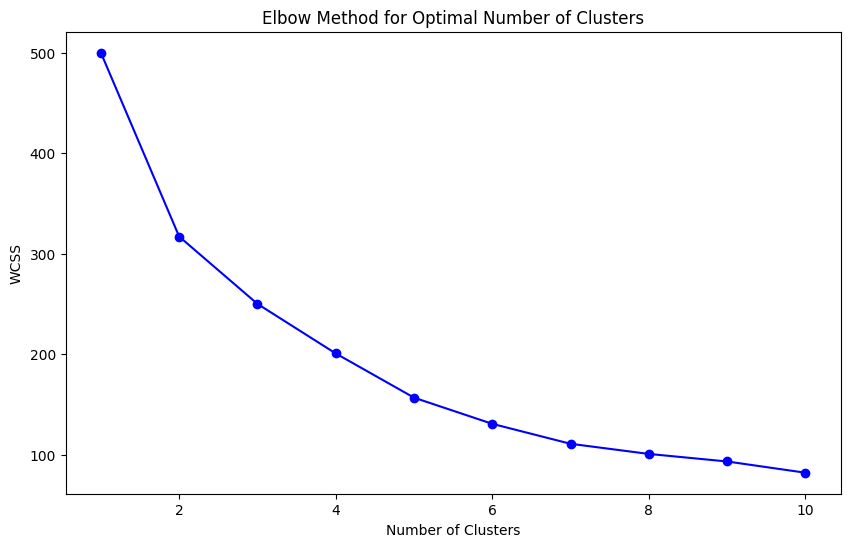

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


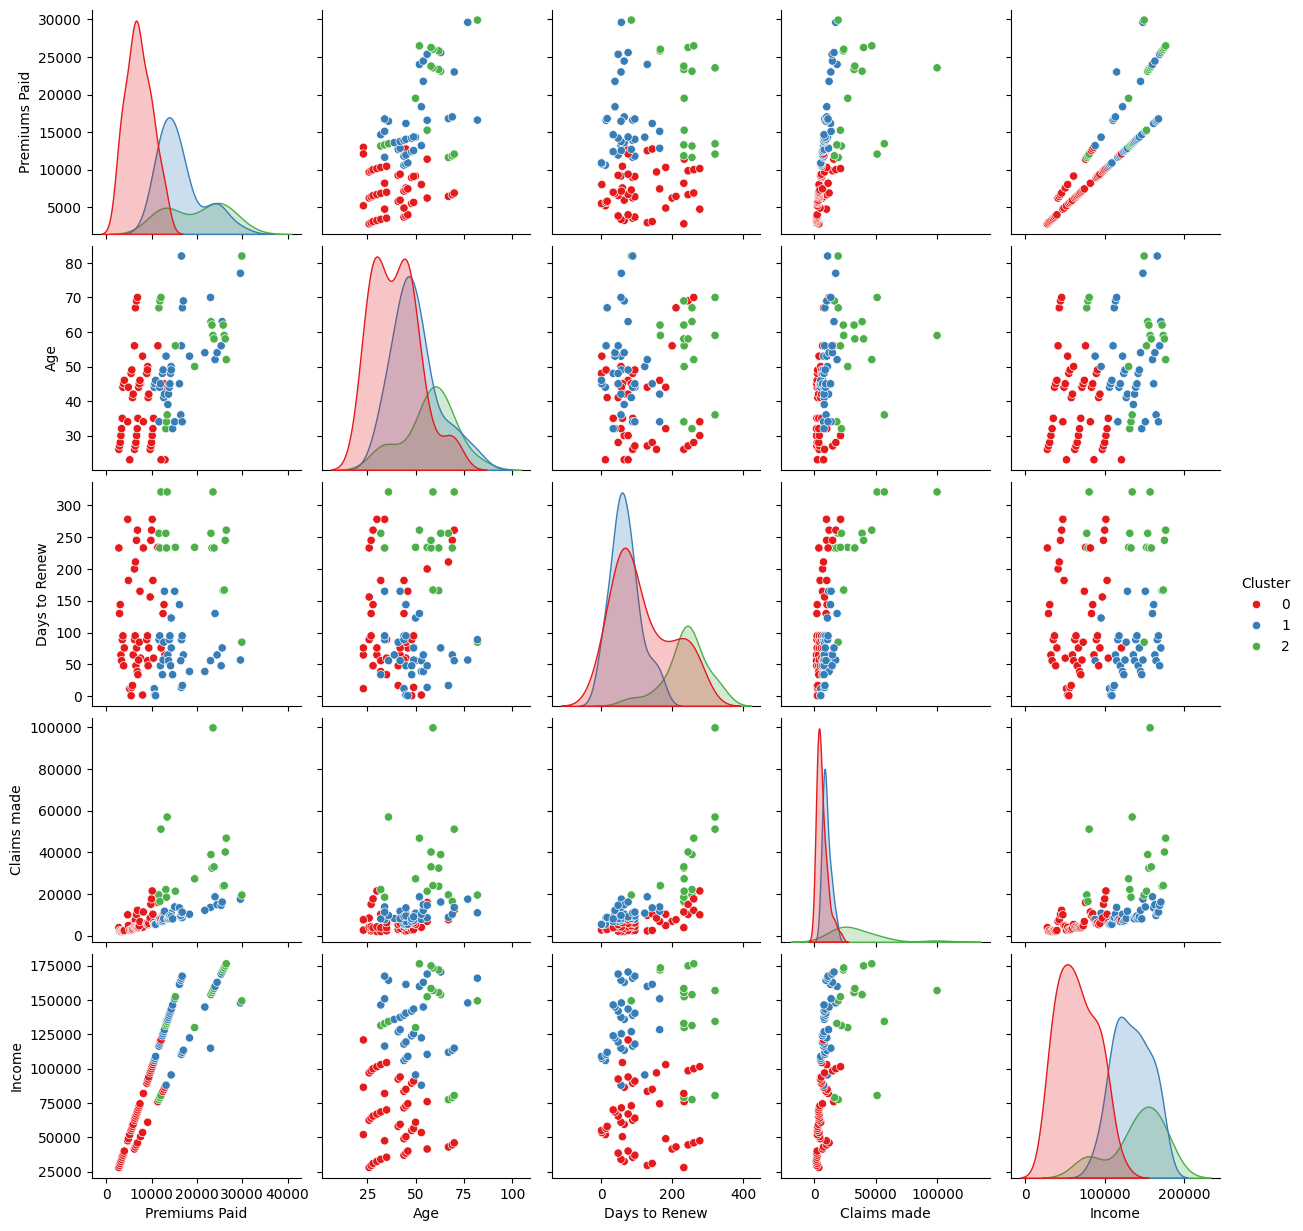

Cluster Centers (original scale):
[[7.25208333e+03 3.95833333e+01 1.16666667e+02 6.43895186e+03
  6.55312500e+04]
 [1.62207143e+04 4.97714286e+01 6.81428571e+01 1.02062690e+04
  1.33985714e+05]
 [1.99058824e+04 5.70000000e+01 2.38529412e+02 3.48006019e+04
  1.40588235e+05]]
Cluster Value Counts:
Cluster
0    48
1    35
2    17
Name: count, dtype: int64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from google.colab import files

# Upload the file
uploaded = files.upload()

# Read the uploaded CSV file
df = pd.read_csv(next(iter(uploaded.keys())))

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

# Display column names to understand the structure
print("\nColumn names in the dataset:")
print(df.columns)

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Identify non-numeric columns to handle them (e.g., categorical data)
non_numeric_columns = df.select_dtypes(include=['object']).columns.tolist()
print(f"\nNon-numeric columns: {non_numeric_columns}")

# One-hot encode categorical variables (if any)
df_encoded = pd.get_dummies(df, columns=non_numeric_columns, drop_first=True)

# Scaling the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded)

# Finding the optimum number of clusters using the Elbow Method
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Fitting K-means with the optimal number of clusters (example: 3)
# Adjust based on the Elbow plot
optimal_clusters = 3  # You may need to change this number based on the Elbow plot
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Inverse transform the cluster centers for better interpretability
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)

# Visualizing the clusters using a pairplot (if dataset is small)
sns.pairplot(df, hue='Cluster', palette='Set1')
plt.show()

# Display the cluster centroids (inverse transformed to original scale)
print("Cluster Centers (original scale):")
print(cluster_centers)

# Show cluster counts
print("Cluster Value Counts:")
print(df['Cluster'].value_counts())

# Saving the clustered data to a new CSV file
df.to_csv('insurance_data_clustered.csv', index=False)

# Download the file to your local machine
files.download('insurance_data_clustered.csv')